k-Means  
Задача 1: Сегментация  
Используйте встроенный в библиотеку seaborn датасет "penguins" для задачи кластеризации. Ваша задача - сегментировать пингвинов с использованием K-means.
Попробуйте иерархическую классификацию и DBSCAN на тех же данных и сравните результаты.  

```
import seaborn as sns
# Load the data
penguins = sns.load_dataset("penguins")
# Preprocess the data (for instance, filling missing data)
penguins.head()
```

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.883375       0.788176          -1.415471    -0.562452
1       -0.809845       0.127001          -1.058960    -0.499877
2       -0.662785       0.432

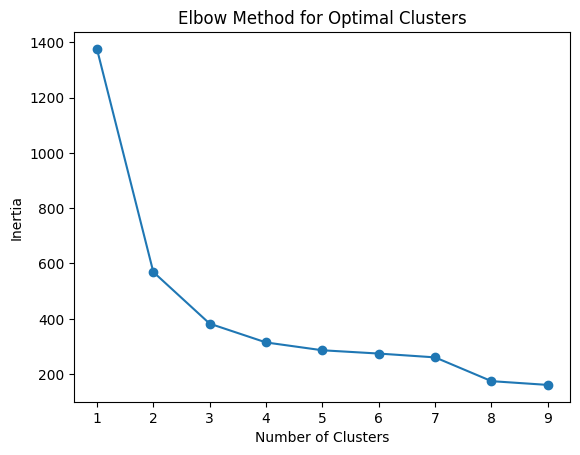

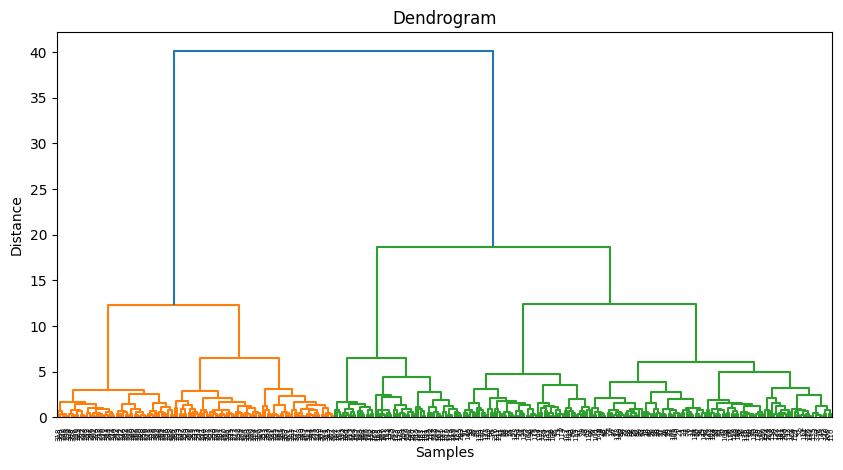

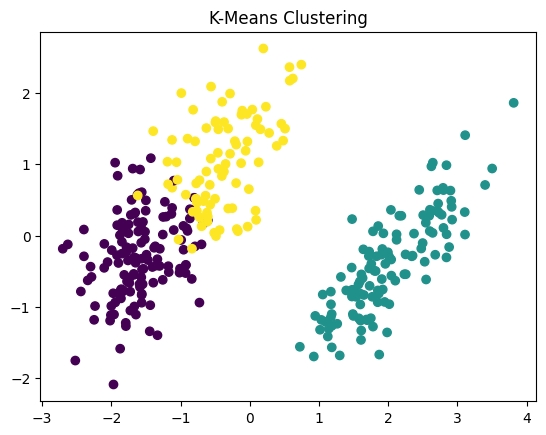

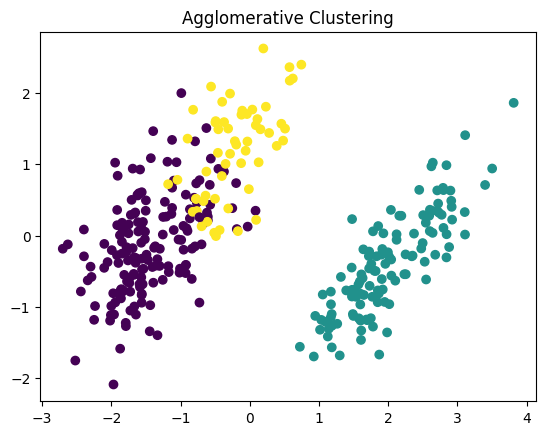

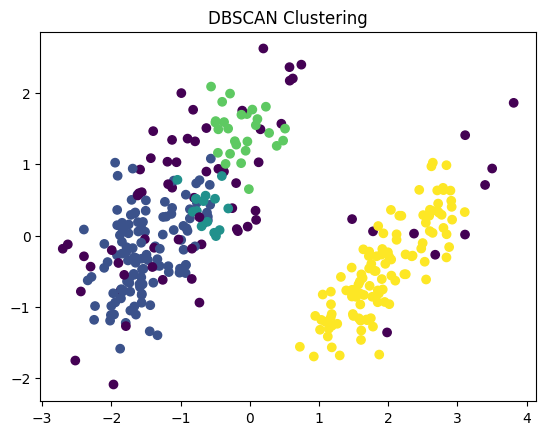

Средние значения признаков по кластерам (K-Means):
               bill_length_mm bill_depth_mm flipper_length_mm  body_mass_g
Cluster_KMeans                                                            
0                   38.251493      18.09403        188.425373  3587.873134
1                   47.504878     14.982114        217.186992   5076.01626
2                   47.525287     18.762069        196.896552  3902.011494
Средние значения признаков по кластерам (Agglomerative):
                      bill_length_mm bill_depth_mm flipper_length_mm  \
Cluster_Agglomerative                                                  
0                           39.17378     18.271951        189.902439   
1                          47.504878     14.982114        217.186992   
2                          49.752632     18.601754        197.105263   

                       body_mass_g  
Cluster_Agglomerative               
0                      3677.286585  
1                       5076.01626  
2       

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
print(penguins.head())

# Проверка на пропуски
print(penguins.isnull().sum())

# Заполнение пропусков
imputer = SimpleImputer(strategy="most_frequent")
penguins_cleaned = pd.DataFrame(imputer.fit_transform(penguins), columns=penguins.columns)

# Выделение числовых признаков
numeric_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
data = penguins_cleaned[numeric_features].astype(float)

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print(pd.DataFrame(data_scaled, columns=numeric_features).head())

# K-Means кластеризация
# Метод локтя для выбора оптимального количества кластеров
inertia = []
range_n_clusters = range(1, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Применение K-Means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)
penguins_cleaned["Cluster_KMeans"] = clusters_kmeans

# Иерархическая кластеризация
# Построение дендрограммы
# Дендрограмма — это графическое представление результатов иерархической
# кластеризации, показывающее, как объекты данных объединяются в кластеры
# на разных уровнях агрегации.
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Применение агломеративной кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_clustering.fit_predict(data_scaled)
penguins_cleaned["Cluster_Agglomerative"] = clusters_agg

# DBSCAN кластеризация
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data_scaled)
penguins_cleaned["Cluster_DBSCAN"] = clusters_dbscan

# Визуализация кластеров с использованием PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация кластеров для K-Means
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

# Визуализация кластеров для агломеративной кластеризации
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_agg, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.show()

# Визуализация кластеров для DBSCAN
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

# Сравнение результатов кластеризации
comparison_kmeans = penguins_cleaned.groupby("Cluster_KMeans")[numeric_features].mean()
print("Средние значения признаков по кластерам (K-Means):")
print(comparison_kmeans)

comparison_agg = penguins_cleaned.groupby("Cluster_Agglomerative")[numeric_features].mean()
print("Средние значения признаков по кластерам (Agglomerative):")
print(comparison_agg)

unique_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
print(f"Количество кластеров, найденных DBSCAN: {unique_clusters_dbscan}")

# Меньшее значение инерции указывает на то, что точки данных ближе к своим центрам кластеров, 
# следовательно, кластеры более плотные и "хорошие".
# Большее значение инерции указывает на то, что кластеры не так плотны или точки находятся 
# далеко от своих центров.

Задача 2: Кластеризация текстовых данных (новостных заголовков)  
Вам нужно скачать [News Aggregator Dataset](https://www.kaggle.com/uciml/news-aggregator-dataset) с Kaggle, предварительно обработать текст новостных заголовков и провести кластеризацию с использованием K-Means. Целью этой задачи является группировка похожих новостей в одном кластере.

Всего заголовков: 422419
0    fed official say weak data caused weather slow...
1    fed charles plosser see high bar change pace t...
2    u open stock fall fed official hint accelerate...
3    fed risk falling behind curve charles plosser say
4          fed plosser nasty weather curbed job growth
Name: TITLE, dtype: object
(422419, 1000)


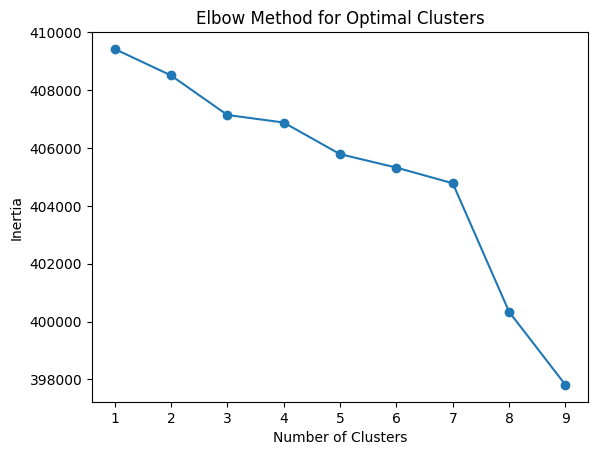

Cluster
0      1507
1      7383
2      1658
3    407134
4      4737
Name: TITLE, dtype: int64
Кластер 0: fda, drug, ecigarettes, new, device, first, warns, treatment, cancer, heart
Кластер 1: stock, market, higher, gain, earnings, lower, rise, data, today, european
Кластер 2: obama, president, climate, school, health, museum, pay, play, order, japan
Кластер 3: new, google, say, apple, video, get, star, report, show, may
Кластер 4: amazon, fire, smartphone, phone, prime, hbo, service, streaming, launch, deal

Кластер 0:
['FDA approves electric headband to prevent migraine'
 'First device to prevent migraine headaches wins FDA approval'
 "'Cefaly' headband-like device to prevent migraines gets FDA nod"
 'FDA Approves Medical Device to Prevent Migraine Headaches [VIDEO]'
 'US FDA approves first device to prevent migraine headaches']

Кластер 1:
['US open: Stocks fall after Fed official hints at accelerated tapering'
 'TECH STOCKS: EBay And Icahn Keep Trading Punches'
 "eBay's John Donahoe

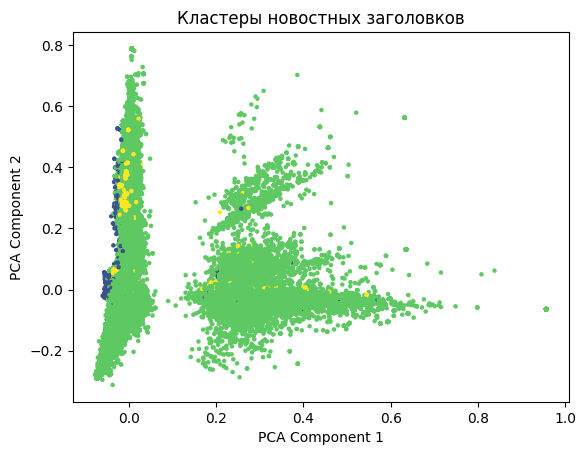

In [9]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv("Data/uci-news-aggregator.csv")

headlines = data["TITLE"]
print(f"Всего заголовков: {len(headlines)}")

# Предобработка текста
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Удаляем спецсимволы
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Лемматизация и удаление стоп-слов
    return " ".join(words)

headlines_cleaned = headlines.apply(preprocess_text)
print(headlines_cleaned.head())

# Преобразование текста в числовой вид
# Векторизация текста с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Оставляем топ-1000 признаков
tfidf_matrix = tfidf_vectorizer.fit_transform(headlines_cleaned)

# Преобразованный массив
print(tfidf_matrix.shape)  # Размерность: (число документов, 1000 признаков)

# Кластеризация с использованием K-Means
# Метод локтя - определяет оптимальное количество кластеров
inertia = []
range_n_clusters = range(1, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Применение K-Means с выбранным числом кластеров
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Добавление результатов в DataFrame
data["Cluster"] = clusters
print(data.groupby("Cluster")["TITLE"].count())

# Анализ кластеров
# Вывод ключевых слов для каждого кластера
terms = tfidf_vectorizer.get_feature_names_out()
centroids = kmeans.cluster_centers_

for i in range(optimal_clusters):
    cluster_terms = centroids[i].argsort()[-10:][::-1]  # Топ-10 ключевых слов
    print(f"Кластер {i}: {', '.join(terms[t] for t in cluster_terms)}")

# Примеры заголовков из каждого кластера
for i in range(optimal_clusters):
    print(f"\nКластер {i}:")
    print(data[data["Cluster"] == i]["TITLE"].head(5).values)

# Визуализация кластеров
# PCA для уменьшения размерности
pca = PCA(n_components=2)
data_pca = pca.fit_transform(tfidf_matrix.toarray())

# Визуализация кластеров
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=5)
plt.title("Кластеры новостных заголовков")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Задача 3:  
Примените алгоритм K-Means к датасету [Wine Recognition Data Set](https://archive.ics.uci.edu/ml/datasets/wine), чтобы выделить кластеры вин на основе их химического анализа.


Размер данных: (178, 13)


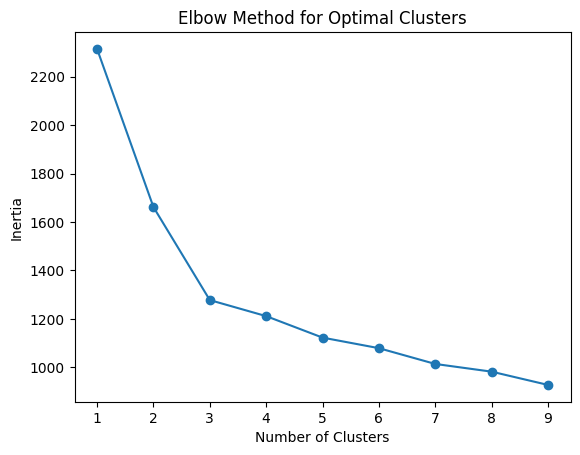

Cluster
0    65
2    62
1    51
Name: count, dtype: int64
Координаты центров кластеров:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.901914  0.461804                      0.270764 -0.753846  
1         0.941539 -1.164789                     -1.292412 -0.407088  
2         0.171063  0.473984                      0.779247  1.125185  
Средние значения признаков по кластерам:
           alcohol  malic_acid   

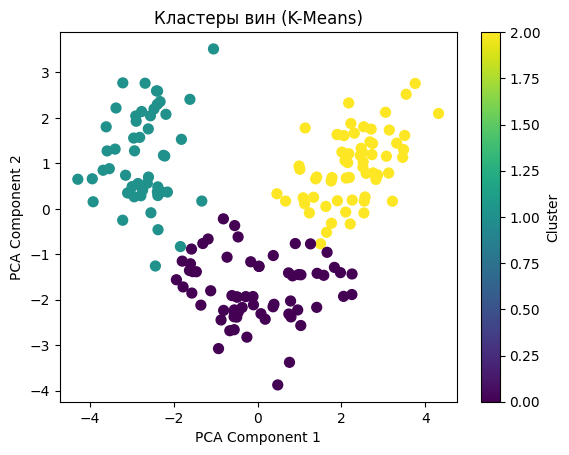

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Размерность данных
print(f"Размер данных: {df.shape}")

# Предварительная обработка
# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Определение оптимального числа кластеров
# Метод локтя
inertia = []
range_n_clusters = range(1, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Применение K-Means
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Добавляем кластеры в DataFrame
df["Cluster"] = clusters

# Вывод количества элементов в каждом кластере
print(df["Cluster"].value_counts())

# Средние значения признаков по кластерам
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=data.feature_names)
print("Координаты центров кластеров:")
print(cluster_centers)

# Группировка данных по кластерам
cluster_analysis = df.groupby("Cluster").mean()
print("Средние значения признаков по кластерам:")
print(cluster_analysis)

# PCA для визуализации
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация кластеров
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Кластеры вин (K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Задача 4:  
Разделите датасет [Wholesale Customers Data](https://archive.ics.uci.edu/ml/datasets/wholesale+customers) на категории. В этом датасете содержатся данные о расходах клиентов оптового дистрибьютора на разные категории продуктов. Цель - сегментировать клиентов по их годовым расходам на разные категории продуктов.


Размер данных: (440, 8)


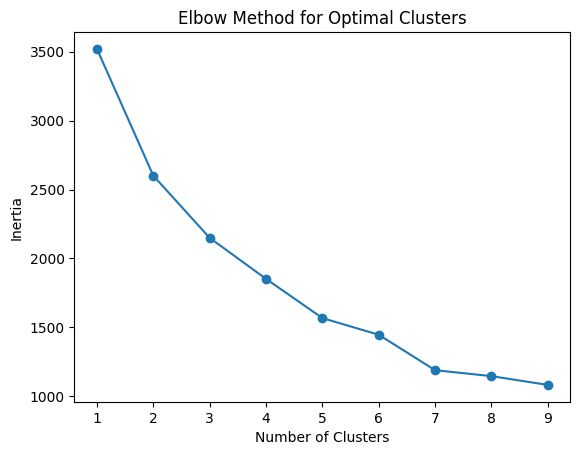

Cluster
1    297
0    130
2     13
Name: count, dtype: int64
Средние значения расходов по кластерам:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        2.000000  2.623077   8165.915385   8748.515385  13905.492308   
1        1.003367  2.505051  13075.898990   3218.737374   3855.696970   
2        1.846154  2.615385  25770.769231  35160.384615  41977.384615   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        1441.630769       5991.146154  1535.007692  
1        3620.400673        776.875421  1242.249158  
2        6844.538462      19867.384615  7880.307692  


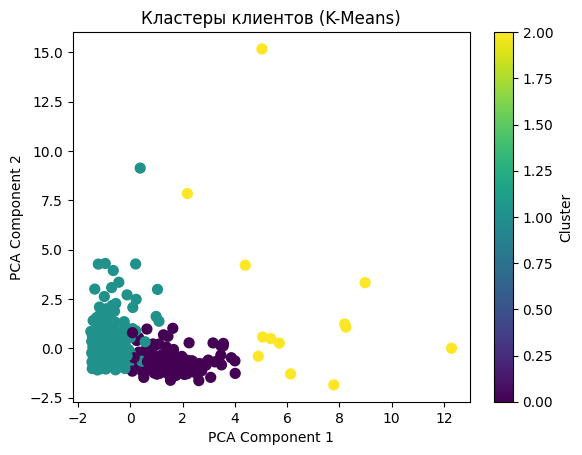

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("Data/Wholesale customers data.csv")

# Проверка размера и описания данных
print(f"Размер данных: {data.shape}")

# Предварительная обработка данных
# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Метод локтя
inertia = []
range_n_clusters = range(1, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Применение K-Means
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Добавление кластеров в исходный DataFrame
data["Cluster"] = clusters

# Сколько объектов в каждом кластере
print(data["Cluster"].value_counts())

# Средние значения расходов по кластерам
cluster_analysis = data.groupby("Cluster").mean()
print("Средние значения расходов по кластерам:")
print(cluster_analysis)

# PCA для уменьшения размерности
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация кластеров
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Кластеры клиентов (K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Иерархические алгоритмы  
Задача 1:  
Примените иерархическую кластеризацию к набору данных [Iris](https://archive.ics.uci.edu/ml/datasets/Iris). Используйте дендрограмму для определения оптимального числа кластеров и сравните свои результаты с фактическими метками.


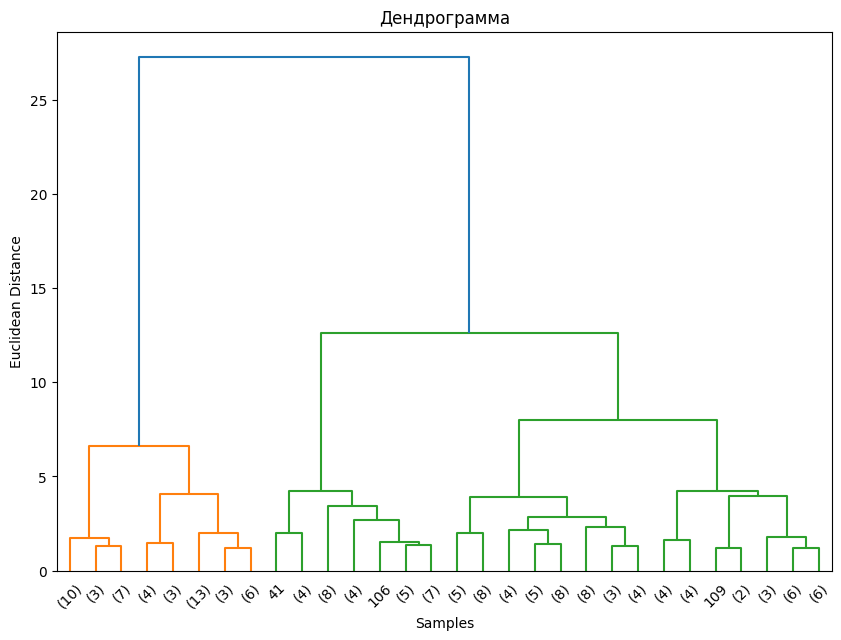

Cluster
0    71
1    49
2    30
Name: count, dtype: int64
Adjusted Rand Index (ARI): 0.6153229932145449
Adjusted Mutual Information (AMI): 0.671286134807129


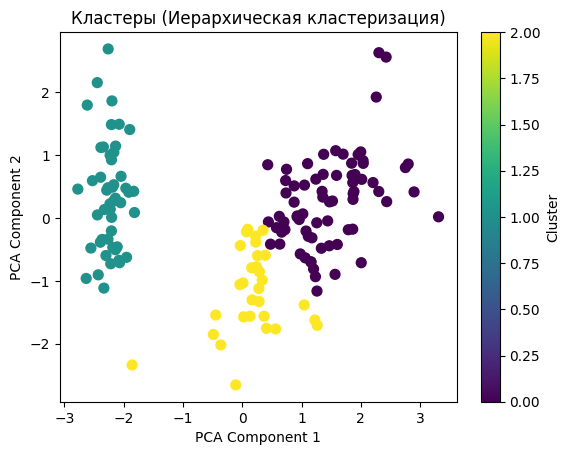

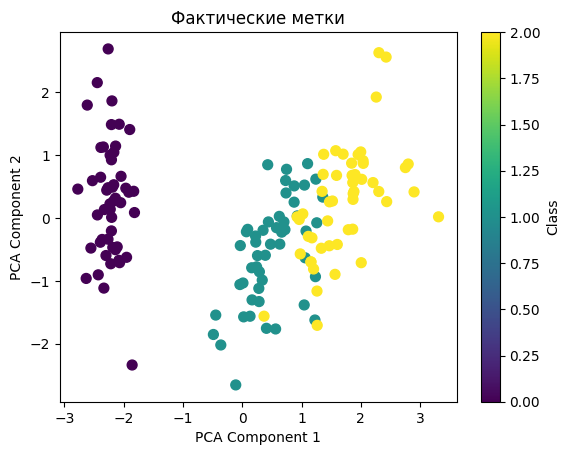

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import matplotlib.pyplot as plt

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Построение дендрограммы
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Дендрограмма")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Применение агломеративной кластеризации
optimal_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)

# Добавление кластеров в DataFrame
df['Cluster'] = clusters
print(df['Cluster'].value_counts())

# Оценка качества кластеризации
ari = adjusted_rand_score(y, clusters)  # ARI (Adjusted Rand Index)
ami = adjusted_mutual_info_score(y, clusters)  # AMI (Adjusted Mutual Information)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Adjusted Mutual Information (AMI): {ami}")

from sklearn.decomposition import PCA

# PCA для снижения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация кластеров
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Кластеры (Иерархическая кластеризация)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Визуализация фактических меток
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Фактические метки")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")
plt.show()


Задача 2:  
Текстовый анализ. Используйте датасет [20 News Groups](http://qwone.com/~jason/20Newsgroups/), который включает в себя около 20 000 сообщений, сгруппированных примерно на 20 новостных групп. Ваша задача заключается в иерархической кластеризации данных с использованием любой техники векторизации текста.


Количество документов: 18846
Количество категорий: 20
Пример текста:


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


Размерность векторизованных данных: (18846, 2000)


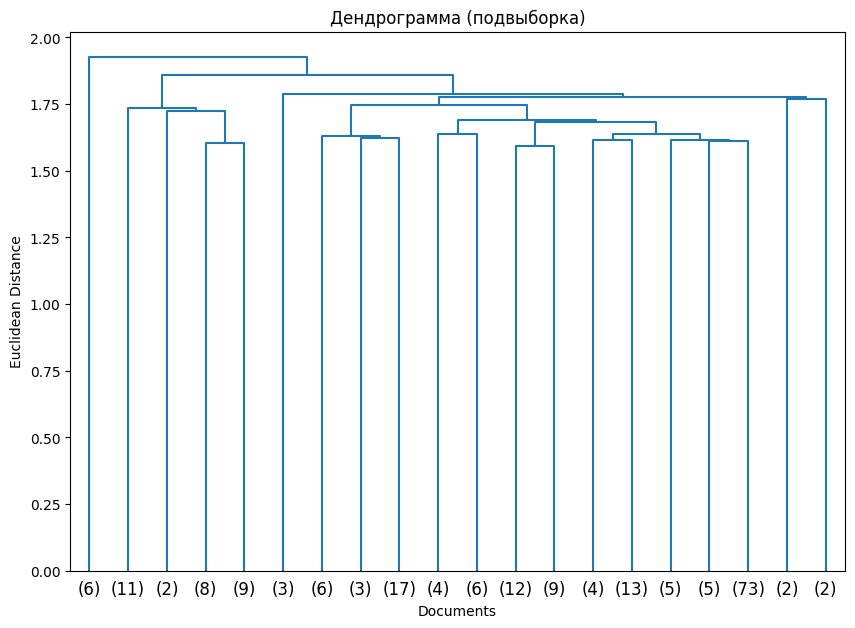

Cluster  Category
0        5           606
         1           324
         2           260
         3           159
         6           145
                    ... 
19       13           38
         10            3
         1             1
         2             1
         11            1
Name: count, Length: 255, dtype: int64


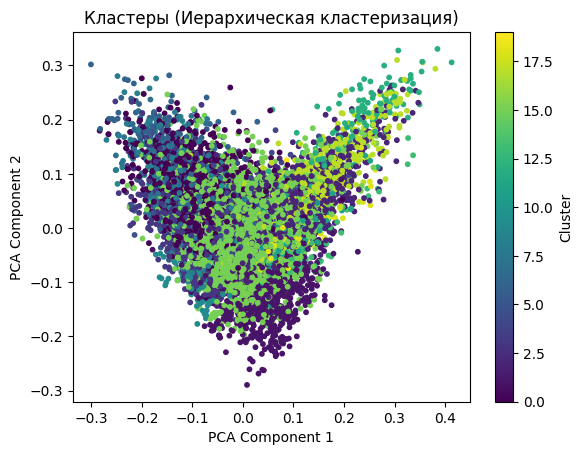

Adjusted Rand Index (ARI): 0.042146379533565134
Adjusted Mutual Information (AMI): 0.24339907108535352


In [18]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Загрузка текста из 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = newsgroups.data
target = newsgroups.target
target_names = newsgroups.target_names

print(f"Количество документов: {len(data)}")
print(f"Количество категорий: {len(target_names)}")
print(f"Пример текста:\n{data[0]}")

# Настройка векторизатора TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')  # Ограничиваем число признаков для эффективности
X_tfidf = vectorizer.fit_transform(data)

print(f"Размерность векторизованных данных: {X_tfidf.shape}")

# Используем подвыборку для дендрограммы (например, 200 документов)
sample_size = 200
X_sample = X_tfidf[:sample_size].toarray()

# Построение дендрограммы
linked = linkage(X_sample, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Дендрограмма (подвыборка)")
plt.xlabel("Documents")
plt.ylabel("Euclidean Distance")
plt.show()

# Применение агломеративной кластеризации
optimal_clusters = 20
agg_clustering = AgglomerativeClustering(
    n_clusters=optimal_clusters, metric='euclidean', linkage='ward'
)
clusters = agg_clustering.fit_predict(X_tfidf.toarray())

# Сравнение с исходными метками
df = pd.DataFrame({"Cluster": clusters, "Category": target})
print(df.groupby("Cluster")["Category"].value_counts())


# PCA для уменьшения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Визуализация кластеров
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("Кластеры (Иерархическая кластеризация)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Оценка качества кластеризации
ari = adjusted_rand_score(target, clusters)
ami = adjusted_mutual_info_score(target, clusters)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Adjusted Mutual Information (AMI): {ami}")


Задача 3:  
Получите данные о фильмах и их рейтинге (ссылка на данные: [Movies Dataset](https://www.kaggle.com/rounakbanik/movie-recommender-systems/data)). Ваша задача - с помощью иерархической кластеризации группировать фильмы по жанрам и средним рейтингам. 


Пример данных о фильмах:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN  

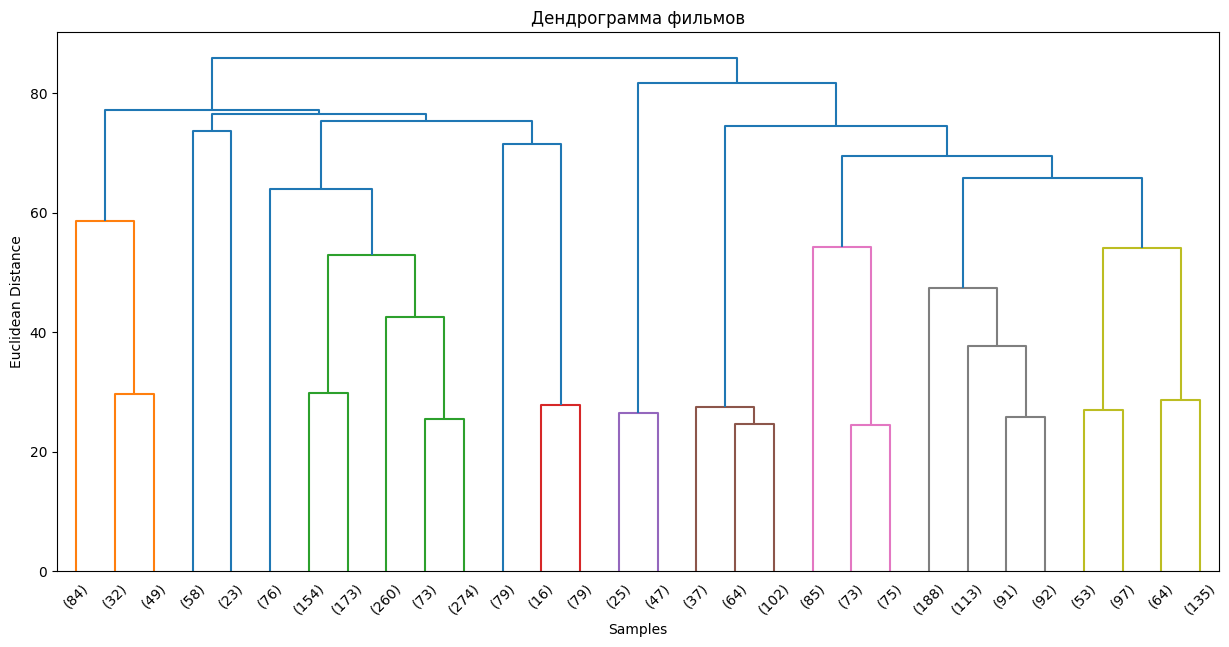


Количество фильмов в каждом кластере:
Cluster
1    1269
0    1184
3     165
4      81
2      72
Name: count, dtype: int64

Средние значения характеристик для каждого кластера:
         average_rating    Action  Adventure  Animation    Comedy     Crime  \
Cluster                                                                       
0              3.302815  0.015203   0.008446   0.000000  0.430743  0.011824   
1              3.362639  0.357762   0.223010   0.000000  0.208038  0.321513   
2              3.217207  0.138889   0.333333   1.000000  0.361111  0.000000   
3              3.312579  0.187879   0.133333   0.000000  0.109091  0.036364   
4              3.426514  0.283951   0.197531   0.012346  0.185185  0.024691   

         Documentary     Drama    Family   Fantasy  ...    Horror     Music  \
Cluster                                             ...                       
0           0.088682  0.671453  0.005912  0.005068  ...  0.005068  0.081081   
1           0.000000  0.425532  

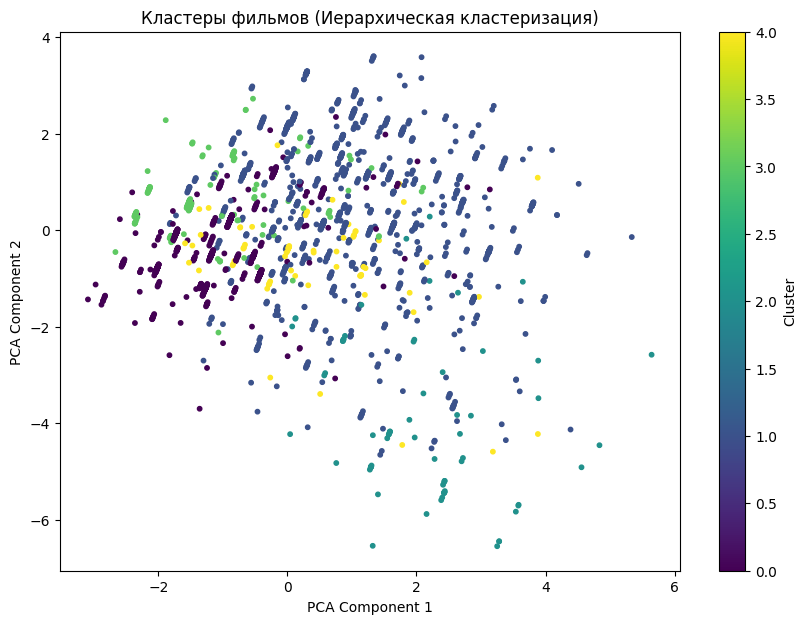

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import ast

movies_path = "Data/movies_metadata.csv"
ratings_path = "Data/ratings_small.csv"

movies = pd.read_csv(movies_path, low_memory=False)
ratings = pd.read_csv(ratings_path)

# Извлечение жанров из столбца 'genres'
def extract_genres(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres]
    except:
        return []

movies['genres_list'] = movies['genres'].apply(extract_genres)

# Приведение столбца 'id' в movies к числовому типу
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

# Удаление строк с некорректными значениями в столбце 'id'
movies.dropna(subset=['id'], inplace=True)

# Приведение типов для объединения
movies['id'] = movies['id'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)

# Расчет среднего рейтинга для каждого фильма
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

# Объединение данных о фильмах с данными о рейтингах
movies = movies.merge(average_ratings, left_on='id', right_on='movieId', how='inner')

# Оставляем только необходимые столбцы
movies = movies[['title', 'genres_list', 'average_rating']]

# Удаляем строки без жанров
movies = movies[movies['genres_list'].map(len) > 0]

# Преобразование жанров в бинарный вид
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies['genres_list']), columns=mlb.classes_)

# Добавляем бинарные жанры к данным
movies = pd.concat([movies, genres_encoded], axis=1)

# Оставляем только числовые столбцы для кластеризации
features = ['average_rating'] + list(mlb.classes_)
data = movies[features]

# Масштабируем данные
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Удаление строк с некорректными значениями
valid_indices = ~np.isnan(data_scaled).any(axis=1) & ~np.isinf(data_scaled).any(axis=1)
movies = movies[valid_indices].reset_index(drop=True)
data_scaled = data_scaled[valid_indices]

# Построение дендрограммы
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Дендрограмма фильмов")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Применение агломеративной кластеризации
optimal_clusters = 5  # Число кластеров из дендрограммы
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(data_scaled)

# Добавляем кластеры в данные
movies['Cluster'] = clusters

# Смотрим количество фильмов в каждом кластере
print("\nКоличество фильмов в каждом кластере:")
print(movies['Cluster'].value_counts())

# Выбираем только числовые столбцы для расчёта среднего значения
numerical_columns = movies.select_dtypes(include=['number']).columns
cluster_analysis = movies.groupby('Cluster')[numerical_columns].mean()

print("\nСредние значения характеристик для каждого кластера:")
print(cluster_analysis)

# Частота жанров в каждом кластере
genre_cluster_distribution = movies.groupby('Cluster')[mlb.classes_].mean()
print("\nЧастота жанров по кластерам:")
print(genre_cluster_distribution)

# PCA для уменьшения размерности до 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация кластеров
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("Кластеры фильмов (Иерархическая кластеризация)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


Задача 4:  
Используйте набор данных [Seeds](https://archive.ics.uci.edu/ml/datasets/seeds) для кластеризации различных сортов пшеницы. Данный набор данных содержит измерения геометрических свойств семян семи различных видов пшеницы. Ваша задача провести иерархическую кластеризацию и визуализировать результаты с помощью дендрограммы.


C:\Users\vladi\AppData\Local\Temp\ipykernel_16176\4042040572.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("Data/seeds_dataset.txt", delim_whitespace=True, names=columns)


Есть ли NaN в данных? False
Есть ли inf в данных? False


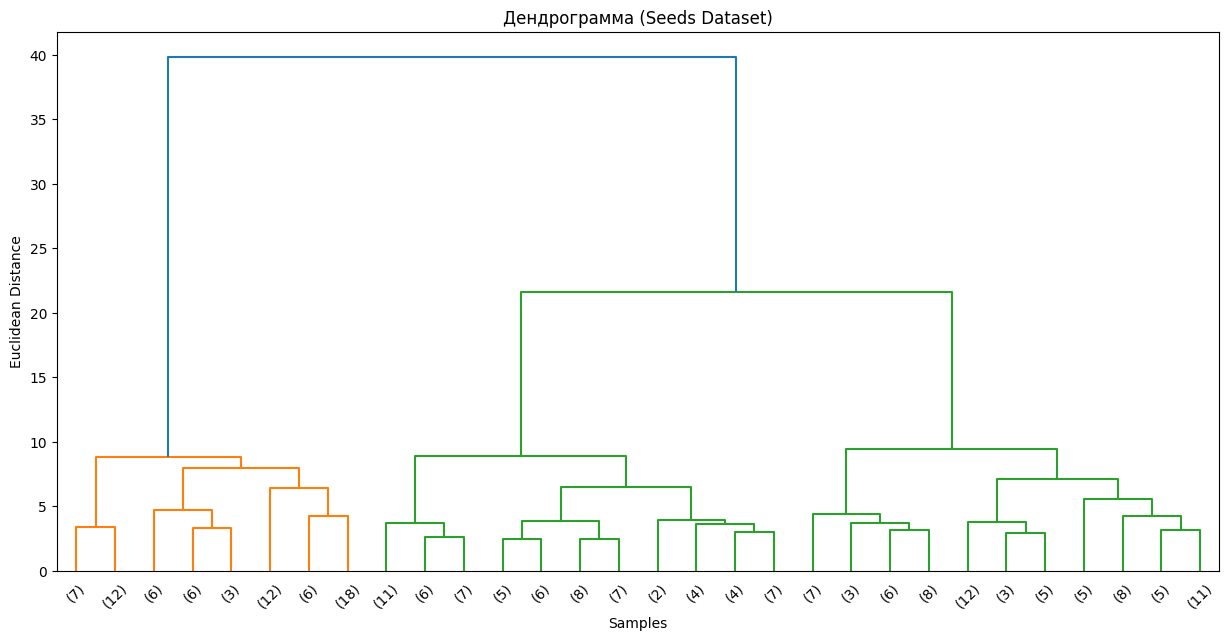


Количество объектов в каждом кластере:
Cluster
0    73
1    70
2    67
Name: count, dtype: int64

Средние значения признаков по кластерам:
              Area  Perimeter  Compactness  KernelLength  KernelWidth  \
Cluster                                                                 
0        14.199041  14.233562     0.879190      5.478233     3.226452   
1        18.371429  16.145429     0.884400      6.158171     3.684629   
2        11.872388  13.257015     0.848072      5.238940     2.848537   

         AsymmetryCoefficient  KernelGrooveLength      Type  
Cluster                                                      
0                    2.612181            5.086178  1.191781  
1                    3.639157            6.017371  1.942857  
2                    4.949433            5.122209  2.940299  


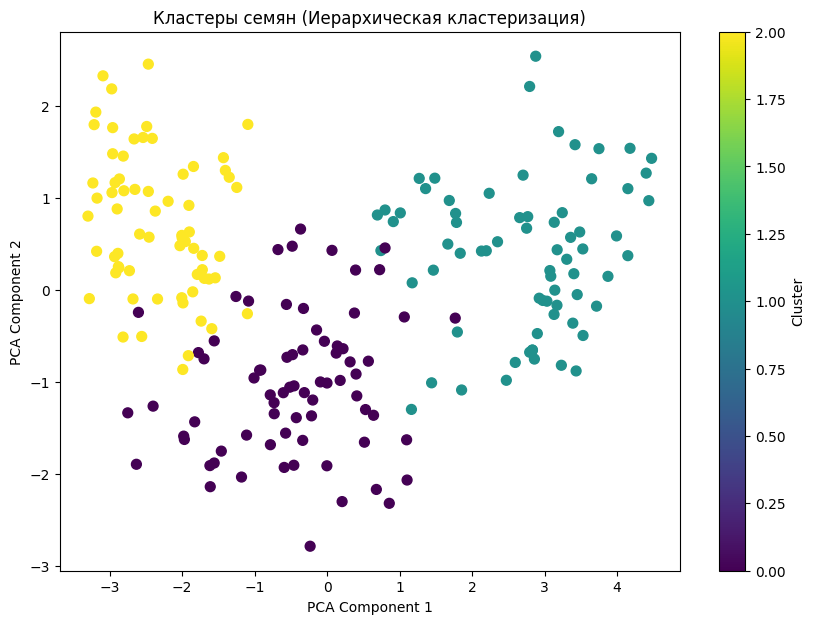

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Определяем названия столбцов
columns = [
    "Area", "Perimeter", "Compactness", "KernelLength", "KernelWidth",
    "AsymmetryCoefficient", "KernelGrooveLength", "Type"
]

# Загружаем данные
data = pd.read_csv("Data/seeds_dataset.txt", delim_whitespace=True, names=columns)

# Предварительная обработка
# Удаляем столбец "Type" (содержит метки классов)
features = data.drop(columns=["Type"])

# Масштабируем данные
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Проверка наличия некорректных значений
print(f"Есть ли NaN в данных? {np.isnan(data_scaled).any()}")
print(f"Есть ли inf в данных? {np.isinf(data_scaled).any()}")

# Построение дендрограммы
# Построение иерархической кластеризации
linked = linkage(data_scaled, method="ward")

# Визуализация дендрограммы
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode="lastp", p=30)
plt.title("Дендрограмма (Seeds Dataset)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Применение агломеративной кластеризации
optimal_clusters = 3  # Предположим, что оптимальное число кластеров равно 3
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")
clusters = agg_clustering.fit_predict(data_scaled)

# Добавляем кластеры в исходный DataFrame
data["Cluster"] = clusters

# Анализ кластеров
print("\nКоличество объектов в каждом кластере:")
print(data["Cluster"].value_counts())

# Средние значения признаков для каждого кластера
cluster_analysis = data.groupby("Cluster").mean()
print("\nСредние значения признаков по кластерам:")
print(cluster_analysis)

# Визуализация кластеров (с помощью PCA)
# Уменьшение размерности до 2D для визуализации
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация кластеров
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("Кластеры семян (Иерархическая кластеризация)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


DBSCAN  
Задача 1:  
Используйте DBSCAN для кластеризации набора данных [Iris](https://archive.ics.uci.edu/ml/datasets/Iris). Сравните полученные результаты с изначальными метками. DBSCAN хорош для этой задачи, поскольку он может находить кластеры произвольной формы.

Adjusted Rand Index (ARI): 0.4420986685885924
Adjusted Mutual Information (AMI): 0.5051666404374139


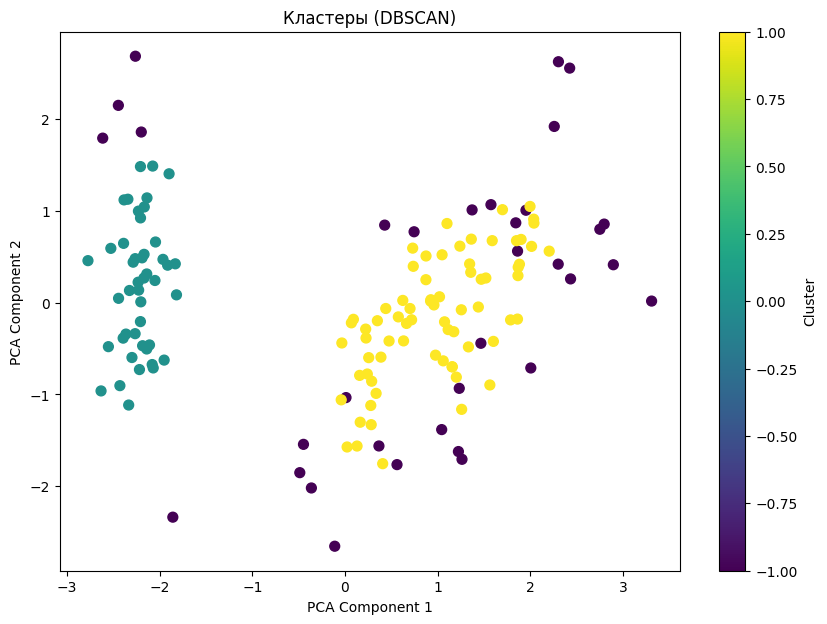

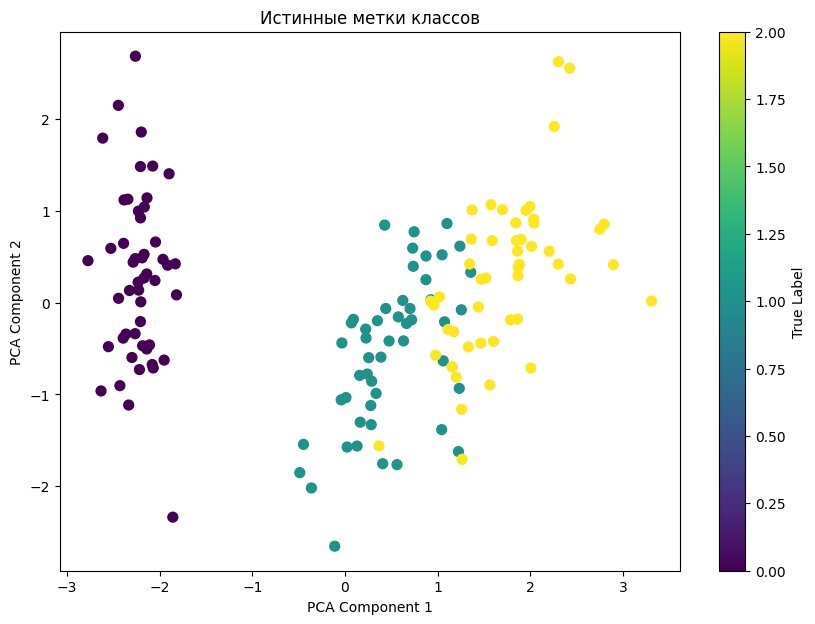

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data  # Признаки
y = iris.target  # Метки классов

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение DBSCAN
# Настройка гиперпараметров DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Добавление кластеров в DataFrame
data = pd.DataFrame(X, columns=iris.feature_names)
data['Cluster'] = clusters
data['True_Label'] = y

# Сравнение результатов
ari = adjusted_rand_score(y, clusters)
ami = adjusted_mutual_info_score(y, clusters)
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Adjusted Mutual Information (AMI): {ami}")

# Визуализация результатов
# Преобразование данных в двумерное пространство с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("Кластеры (DBSCAN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Визуализация истинных меток классов
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", s=50)
plt.title("Истинные метки классов")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="True Label")
plt.show()


Задача 2:  
Примените DBSCAN для кластеризации датасета [Moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) из библиотеки sklearn. Этот набор данных идеально подходит для демонстрации преимуществ DBSCAN, потому что он содержит два визуально различимых "месяца", и каждый из них должен стать отдельным кластером. 


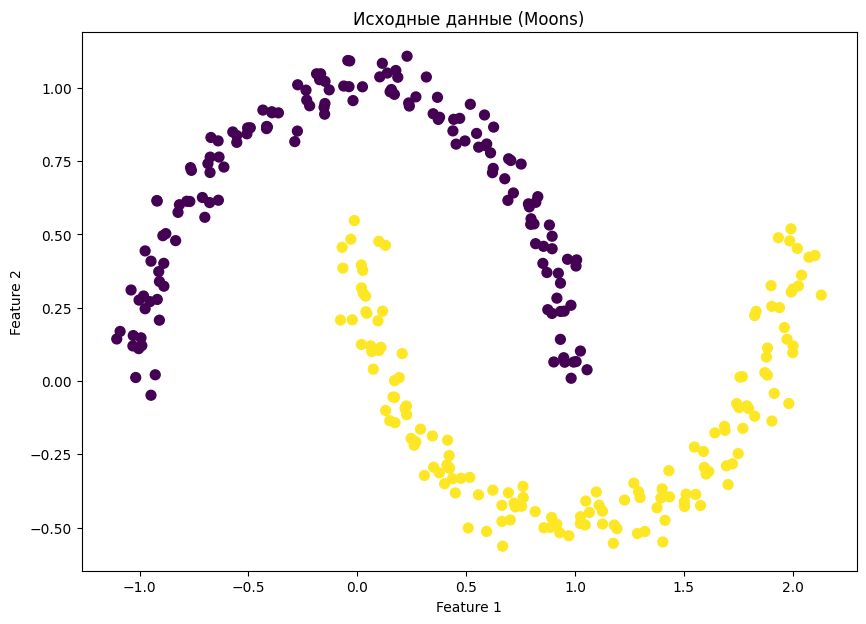


Распределение точек по кластерам:
Cluster
 0    150
 1    148
-1      2
Name: count, dtype: int64


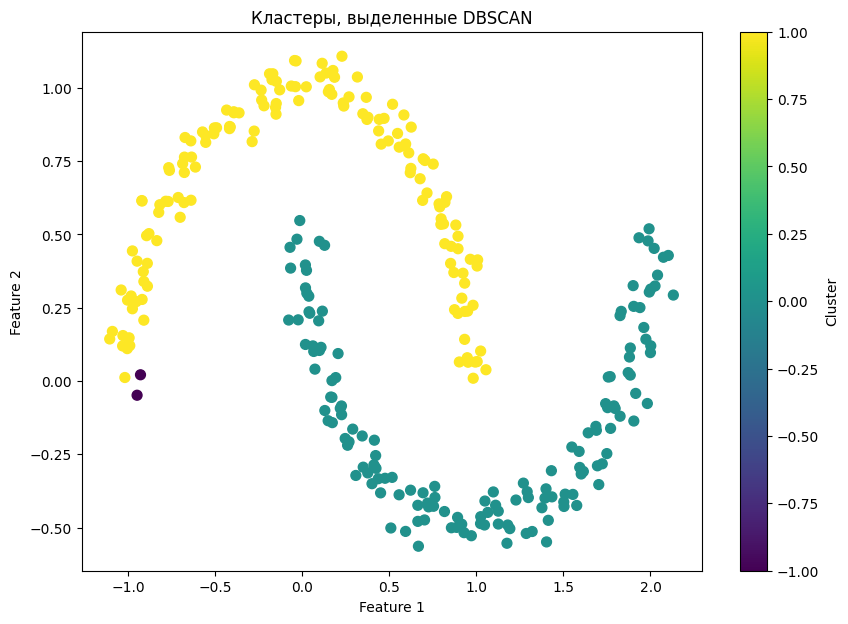


Количество шумовых точек:
2


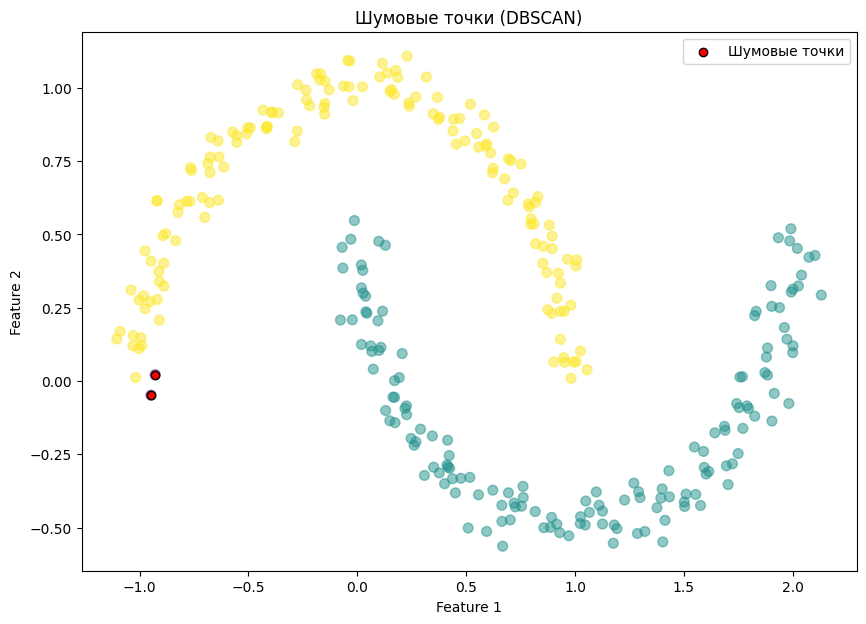

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
data = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
data["True Label"] = y

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=50)
plt.title("Исходные данные (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Добавление кластеров в DataFrame
data["Cluster"] = clusters

# Проверка распределения точек по кластерам
print("\nРаспределение точек по кластерам:")
print(data["Cluster"].value_counts())

# Визуализация кластеров, найденных DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("Кластеры, выделенные DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Анализ шумовых точек
noise_points = data[data["Cluster"] == -1]
print("\nКоличество шумовых точек:")
print(len(noise_points))

# Визуализация шумовых точек отдельно
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", s=50, alpha=0.5)
plt.scatter(
    noise_points["Feature 1"], noise_points["Feature 2"],
    c="red", label="Шумовые точки", edgecolors="black"
)
plt.title("Шумовые точки (DBSCAN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Задача 3:  
Используйте пакет DBSCAN в Python для кластеризации геолокационных данных (например, [Geolife GPS Trajectories](https://archive.ics.uci.edu/ml/datasets/Geolife+Trajectories+1.3)). Целью будет выявление основных мест сбора/перехода на основе GPS-координат.


In [ ]:
# Датасет не найден

Задача 4:  
Используйте DBSCAN для кластеризации датасета с уникальной структурой - [Mouse (3y)](https://cs.joensuu.fi/sipu/datasets/). Этот набор данных содержит координаты, которые образуют форму мыши, и DBSCAN может быть использован для обнаружения этой структуры.


In [29]:
# Датасет не найден